In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])


C:\Users\jhyang\AppData\Local\Temp\ipykernel_22940\2781304507.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


d:\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


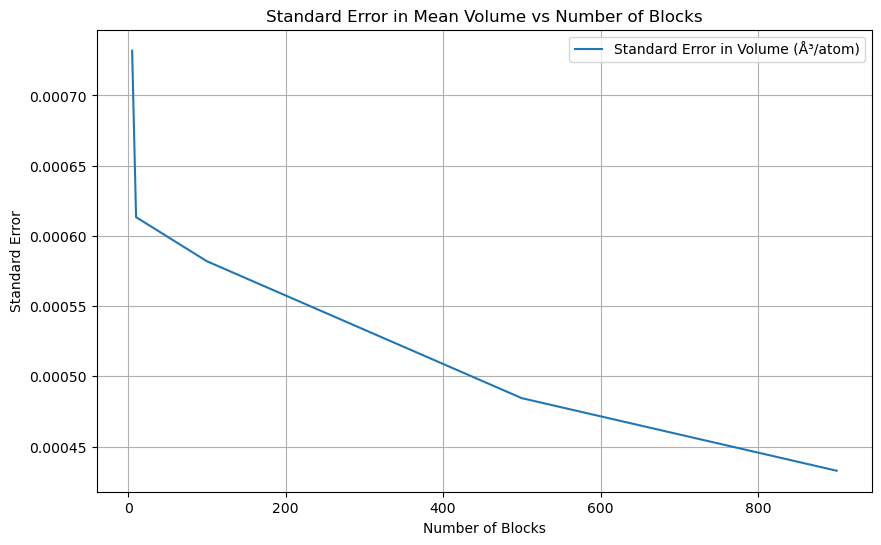

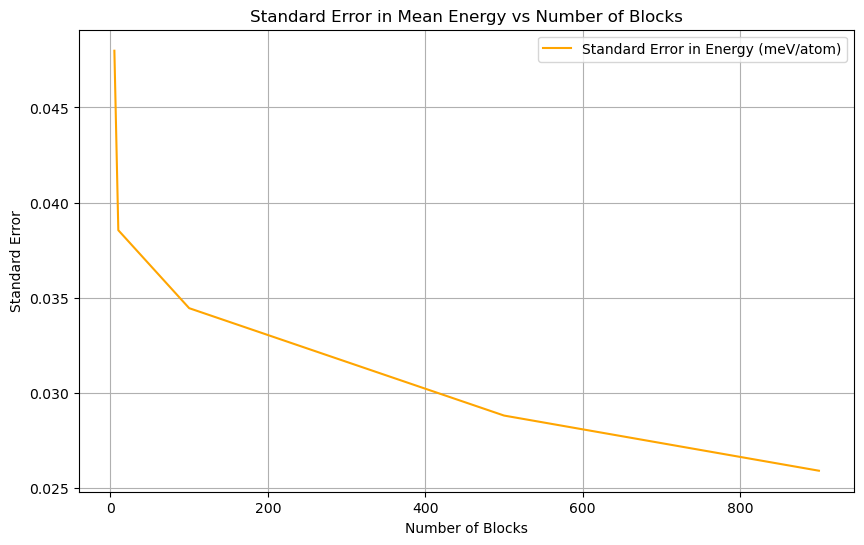

In [3]:
# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    blocks = np.array_split(data[column], num_blocks)
    block_means = [block.mean() for block in blocks]
    std_dev = np.std(block_means)
    return std_dev / np.sqrt(num_blocks)

# Calculate standard error for different block sizes
block_sizes = [5, 10, 100, 500, 900]
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'Energy_meV_per_atom', n) for n in block_sizes]

# Plot the Standard Error for Volume
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, volume_errors, label='Standard Error in Volume (Å³/atom)')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Volume vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()

# Plot the Standard Error for Energy
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, energy_errors, label='Standard Error in Energy (meV/atom)', color='orange')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Energy vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])


C:\Users\jhyang\AppData\Local\Temp\ipykernel_22940\2781304507.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


In [5]:
# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    blocks = np.array_split(data[column], num_blocks)
    block_means = [block.mean() for block in blocks]
    std_dev = np.std(block_means)
    return std_dev / np.sqrt(num_blocks)

# Define block sizes and corresponding simulation times
block_sizes = [5, 10, 100, 500, 900]
simulation_times = [data['TimeStep'].iloc[-1] * 0.001 / n for n in block_sizes]  # Convert timesteps to picoseconds

# Calculate standard errors for volume and energy for different block sizes
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'TotalEnergy_eV_per_atom', n) for n in block_sizes]

# Create the table
table_2_df = pd.DataFrame({
    'Number of Blocks': block_sizes,
    'Simulation Time (picosecond)': simulation_times,
    'Standard Error in the Mean Volume (Å³/atom)': volume_errors,
    'Standard Error in the Mean Energy (eV/atom)': energy_errors
})

# Output the table
print("Table 2 - Error Estimation")
print(table_2_df)

d:\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Table 2 - Error Estimation
   Number of Blocks  Simulation Time (picosecond)  \
0                 5                    200.000000   
1                10                    100.000000   
2               100                     10.000000   
3               500                      2.000000   
4               900                      1.111111   

   Standard Error in the Mean Volume (Å³/atom)  \
0                                     0.000732   
1                                     0.000613   
2                                     0.000582   
3                                     0.000484   
4                                     0.000433   

   Standard Error in the Mean Energy (eV/atom)  
0                                     0.000048  
1                                     0.000039  
2                                     0.000034  
3                                     0.000029  
4                                     0.000026  
